In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench import load_results

# === Load results ===
experiments, outcomes = load_results('dike_experiments_3.tar.gz')

[MainProcess/INFO] results loaded successfully from /Users/amaryllisbrosens/PycharmProjects/MBDM-Group-1/dike_experiments_3.tar.gz


In [2]:
# Display a summary
print("Experiments (designs and uncertainties):")
print(experiments.head())

print("\nOutcomes (keys only):")
print(list(outcomes.keys()))


Experiments (designs and uncertainties):
   A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                       48  220.140583       1.5   0.609045  181.193843   
1                       44  145.522065       1.5   0.498324  113.805325   
2                      123  107.208082      10.0   0.254932  226.058879   
3                       65  177.569290       1.0   0.933936  347.605097   
4                      106   51.940566       1.5   0.172971  199.283728   

  A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0      10.0   0.034983  269.816926       1.5   0.143686  ...   
1       1.5   0.043664  142.831160       1.0   0.307804  ...   
2       1.5   0.293692  223.053311       1.5   0.195097  ...   
3       1.5   0.654838  135.238999       1.0   0.429764  ...   
4       1.5   0.471161  154.690598      10.0   0.434490  ...   

   A.3_DikeIncrease 2 A.4_DikeIncrease 0  A.4_DikeIncrease 1  \
0                   0                  0                   

In [3]:
print(len(experiments))


1000


In [4]:
# Print all available outcome names
print("Available outcome names:")
for outcome_name in outcomes.keys():
    print(outcome_name)

Available outcome names:
A.1 Total Costs
A.1_Expected Number of Deaths
A.1_Minimum Water Level
A.1_95% Guaranteed Water Level
A.1_98% Guaranteed Water Level
A.2 Total Costs
A.2_Expected Number of Deaths
A.2_Minimum Water Level
A.2_95% Guaranteed Water Level
A.2_98% Guaranteed Water Level
A.3 Total Costs
A.3_Expected Number of Deaths
A.3_Minimum Water Level
A.3_95% Guaranteed Water Level
A.3_98% Guaranteed Water Level
A.4 Total Costs
A.4_Expected Number of Deaths
A.4_Minimum Water Level
A.4_95% Guaranteed Water Level
A.4_98% Guaranteed Water Level
A.5 Total Costs
A.5_Expected Number of Deaths
A.5_Minimum Water Level
A.5_95% Guaranteed Water Level
A.5_98% Guaranteed Water Level
RfR Total Costs
Expected Evacuation Costs


In [12]:
# === Define targets for PRIM ===
# target 5 m as the transport company asked us

target = (outcomes['A.1_Minimum Water Level'] > 5) & (outcomes['A.2_Minimum Water Level'] > 5) & (outcomes['A.3_Minimum Water Level'] > 5)  & (outcomes['A.4_Minimum Water Level'] > 5) & (outcomes['A.5_Minimum Water Level'] > 5)

In [13]:
# === Run PRIM ===
prim_alg = prim.Prim(experiments, target, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()


[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 1000 points remaining, containing 226 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.07, coverage: 0.30973451327433627, density: 1.0 restricted_dimensions: 10


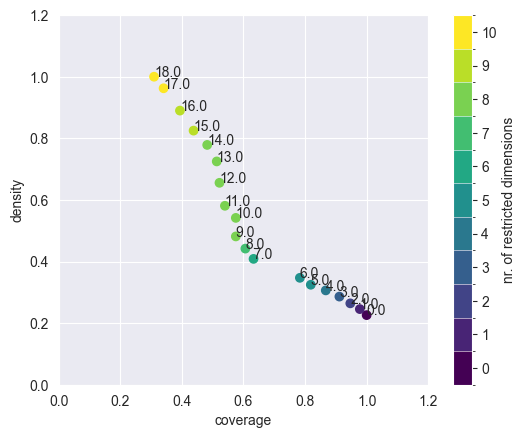

In [14]:
# === Plot and inspect ===
box1.show_tradeoff(annotated =True)
plt.show()

coverage      0.513274
density       0.725000
id           13.000000
k           116.000000
mass          0.160000
mean          0.725000
n           160.000000
res_dim       8.000000
Name: 13, dtype: float64

                                  box 13                                     
                                     min              max  qp value  qp value
A.0_ID flood wave shape              0.0            116.0       NaN  0.000001
A.1_pfail                        0.00106         0.808858       NaN  0.003407
A.2_Bmax                       32.331656       317.256912       NaN  0.003693
discount rate 1          {1.5, 2.5, 4.5}  {1.5, 2.5, 4.5}  0.000198       NaN
A.5_pfail                       0.124945         0.950999  0.007150  0.036989
A.3_Bmax                       58.775339       305.050759  0.007997  0.001536
A.2_pfail                          0.104         0.991791  0.018921       NaN
A.3_pfail                       0.063718         0.801519  0.018921  0.000011



/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 4.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 4.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


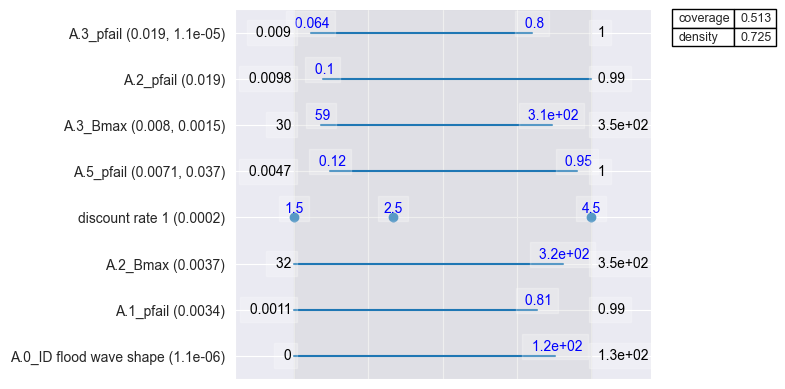

In [15]:
# choose a box that has moderate to high coverage (captures many good cases)
# and higher density

point = 13
# Inspect top box
box1.inspect(point)
box1.inspect(point, style='graph')
plt.show()

In [ ]:
# | Term         | Meaning                                                                    |
# | ------------ | -------------------------------------------------------------------------- |
# | **coverage** | % of all target (interesting) cases included in this box (here: \~51.3%)   |
# | **density**  | % of cases in the box that are target cases (here: 72.5%)                  |
# | **id**       | The box ID (13)                                                            |
# | **k**        | Number of peeling iterations (116)                                         |
# | **mass**     | % of the dataset that lies in this box (16%)                               |
# | **mean**     | Same as density (72.5%)                                                    |
# | **n**        | Total number of cases in this box (160 cases)                              |
# | **res\_dim** | Dimensionality of the box (number of variables used to define it, here: 8) |


# | Variable                  | Min             | Max      | qp value | Notes
# | `A.0_ID flood wave shape` | 0.0             | 116.0    | NaN      | Used to define box, but no q-value (probably not very influential) |
# | `A.1_pfail`               | 0.00106         | 0.80886  | 0.003407 | Influential, based on q-value
# | `discount rate 1`         | {1.5, 2.5, 4.5} | same     | 0.000198 | It's categorical (not numeric), hence warning
# | `A.3_pfail`               | 0.063718        | 0.801519 | 0.000011 | Very small q-value = possibly most influential


In [28]:
#resampling

box1.resample(point)

[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '99.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste

,reproduce coverage,reproduce density
A.3_Brate,90.0,90.0
discount rate 2,90.0,90.0
A.1_Bmax,60.0,70.0
A.0_ID flood wave shape,50.0,60.0
A.1_pfail,50.0,60.0
A.3_Bmax,40.0,50.0
A.4_Brate,40.0,50.0
A.4_Bmax,20.0,30.0
A.4_pfail,20.0,30.0
A.2_Brate,20.0,20.0


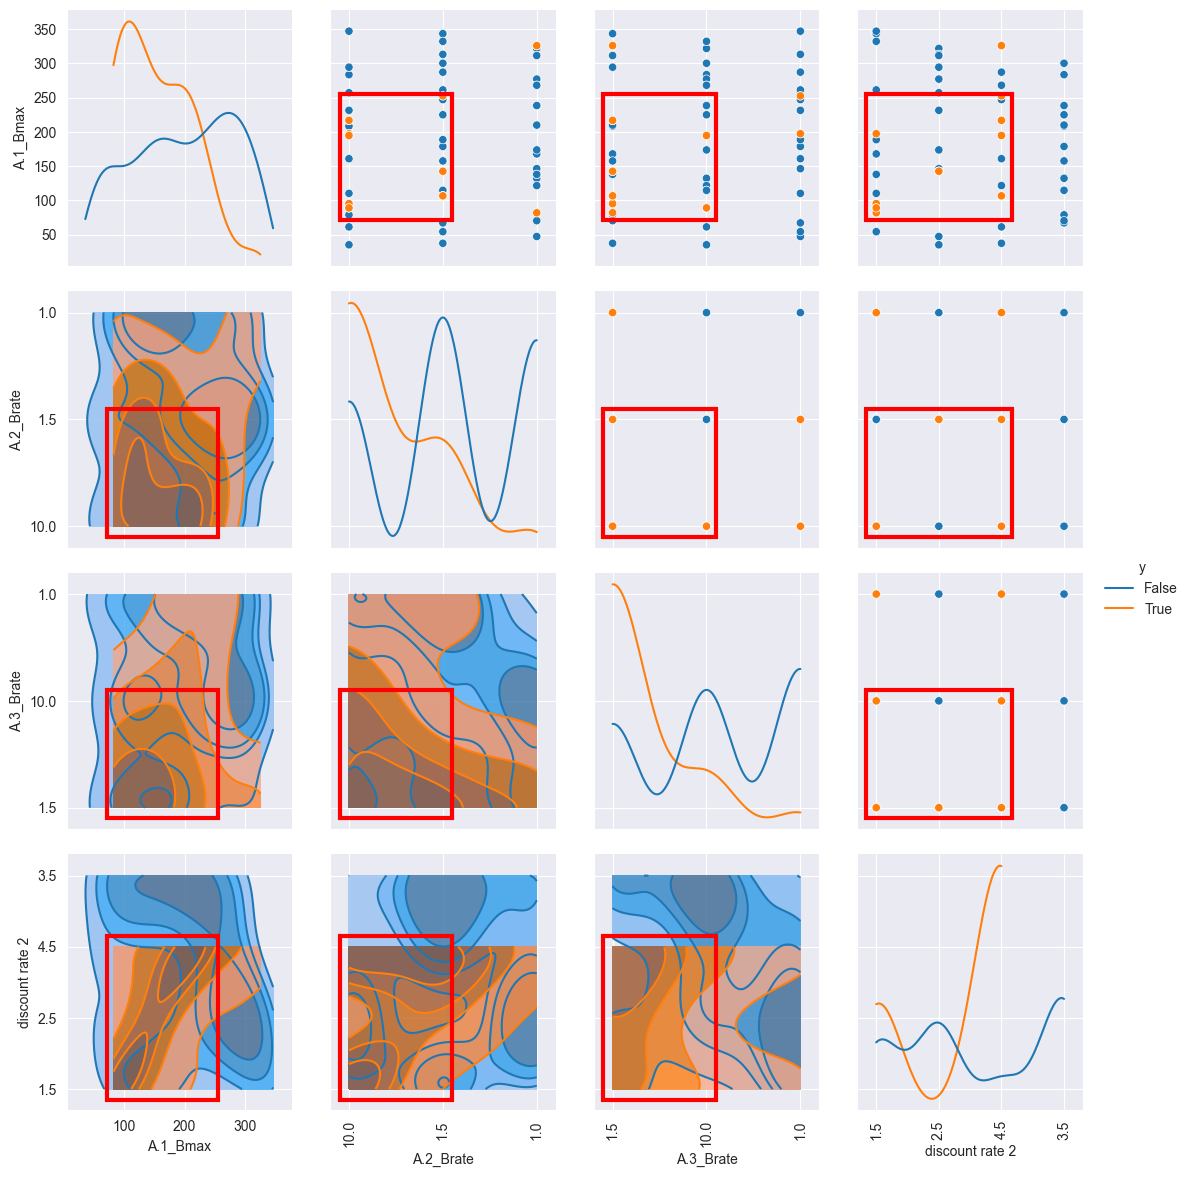

In [30]:
box1.select(7)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [31]:
#Visualize results using dimensional stacking


from ema_workbench.analysis import dimensional_stacking

[MainProcess/INFO] model dropped from analysis because only a single category
/Users/amaryllisbrosens/Downloads/epa141A_open-master/.venv/lib/python3.13/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


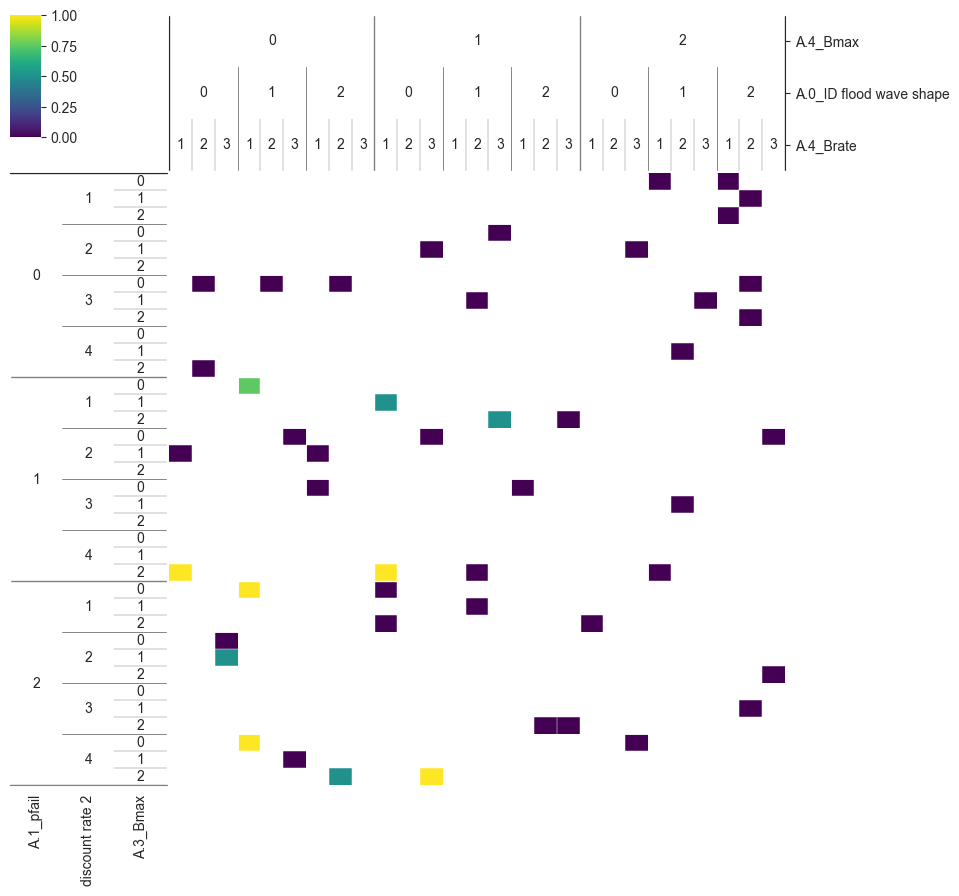

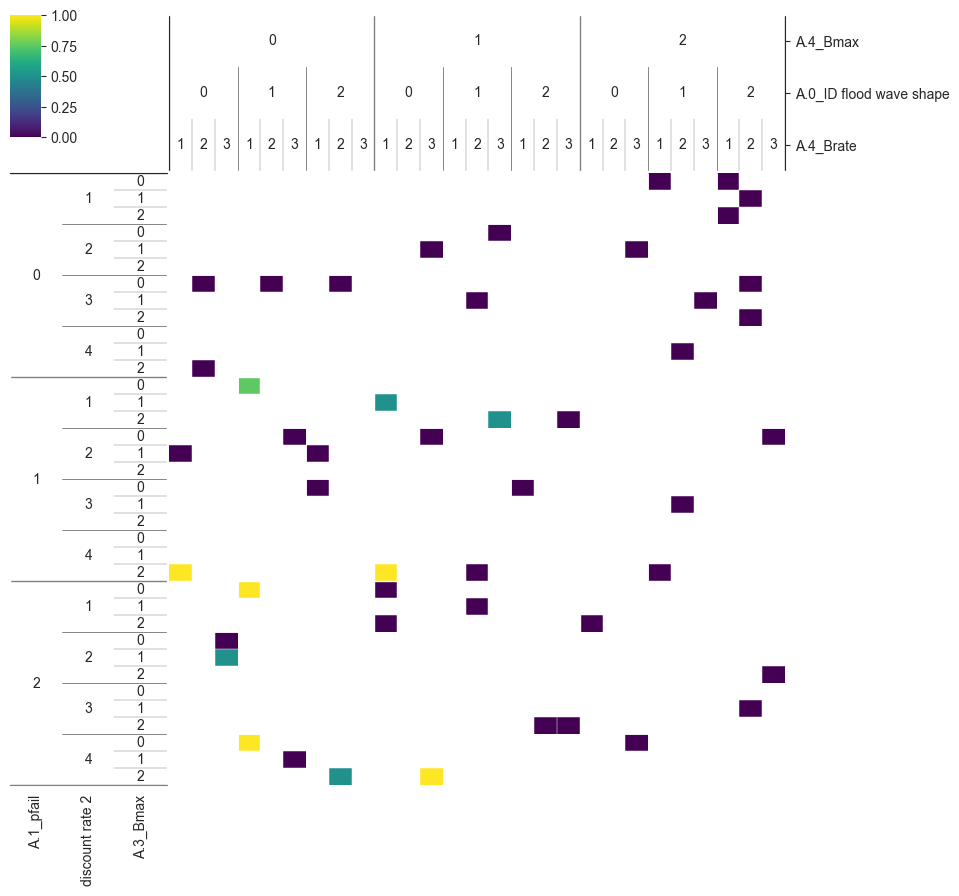

In [32]:
dimensional_stacking.create_pivot_plot(experiments, target)